In [4]:
import healpy as hp
import matplotlib.pyplot as plt
from add_planck_galccs.generate_galcc_maps import galcc_mapper
import pysm3.units as u
planck_map, h = hp.read_map("/global/homes/j/justinc/Galactic Cold Clumps/HFI_SkyMap_353_2048_R2.02_full.fits", h = True)
blank = galcc_mapper()
galccmap_circs = blank.galcc_map(catalogue = "PGCC.csv", 
                           freq_out = None, 
                           nside = 2048, 
                           shape_circ = True,
                           store_maps = True, 
                           output_units = u.K_CMB)

galccmap_ellip = blank.galcc_map(catalogue = "PGCC.csv", 
                           freq_out = None, 
                           nside = 2048, 
                           shape_circ = False,
                           store_maps = True, 
                           output_units = u.K_CMB)


combined_map_circs = planck_map.copy()
combined_map_ellip = planck_map.copy()
combined_map_circs += galccmap_circs
combined_map_ellip += galccmap_ellip

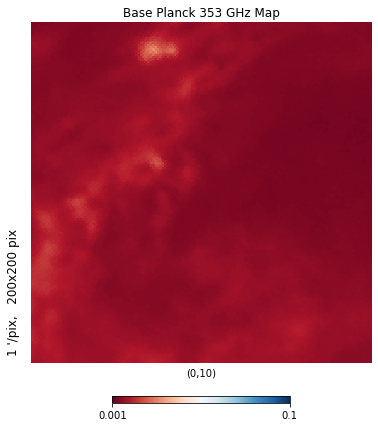

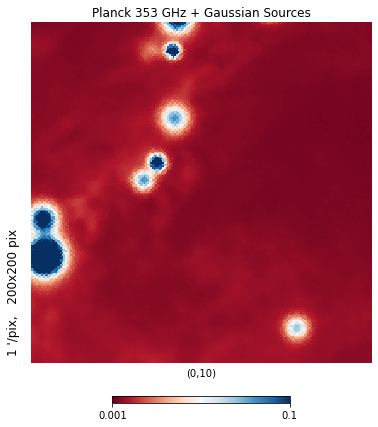

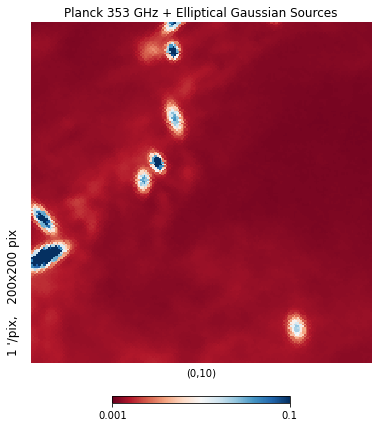

In [8]:
hp.gnomview(planck_map,         rot = [0, 10], min = 0.001, max = 0.1, reso = 1, title = 'Base Planck 353 GHz Map', cmap = 'RdBu')
hp.gnomview(combined_map_circs, rot = [0, 10], min = 0.001, max = 0.1, reso = 1, title = 'Planck 353 GHz + Gaussian Sources', cmap = 'RdBu')
hp.gnomview(combined_map_ellip, rot = [0, 10], min = 0.001, max = 0.1, reso = 1, title = 'Planck 353 GHz + Elliptical Gaussian Sources', cmap = 'RdBu')